<a href="https://colab.research.google.com/github/Mwangi-dan/linear_regression_model/blob/main/summative/linear_regression/cellphone_prediction_multivariate_Linear_regression_Daniel_Ndungu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
# Loading the data
cell_data_path = "/content/drive/MyDrive/ML_summative/Data/Cellphone.csv"

data = pd.read_csv("/content/drive/MyDrive/ML_summative/Data/Cellphone.csv")

# print first rows
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [5]:
# Explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


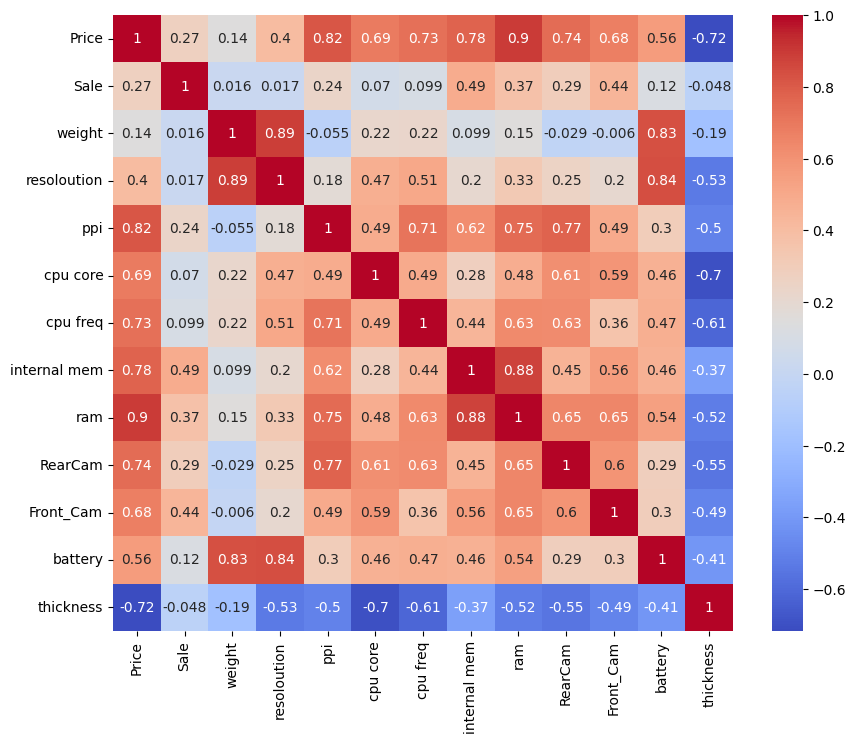

In [29]:
# Removing unnecessary column product_id
data.drop('Product_id', axis=1, inplace=True)

# Heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [85]:
# Select only the necessary features
features = data[['ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']]
target = data['Price']

print(target)
print(features)

0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64
     ppi  cpu core  cpu freq  internal mem    ram  RearCam  Front_Cam  \
0    424         8     1.350          16.0  3.000    13.00        8.0   
1    233         2     1.300           4.0  1.000     3.15        0.0   
2    312         4     1.200           8.0  1.500    13.00        5.0   
3    233         2     1.300           4.0  0.512     3.15        0.0   
4    233         2     1.300           4.0  1.000     3.15        0.0   
..   ...       ...       ...           ...    ...      ...        ...   
156  538         4     1.875         128.0  6.000    12.00       16.0   
157  534         4     1.975         128.0  6.000    20.00        8.0   
158  401         8     2.200          64.0  4.000    20.00       20.0   
159  534         4     1.975         128.0  6.000    20.00        8.0   
160  367         8     1.5

In [86]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ppi           161 non-null    int64  
 1   cpu core      161 non-null    int64  
 2   cpu freq      161 non-null    float64
 3   internal mem  161 non-null    float64
 4   ram           161 non-null    float64
 5   RearCam       161 non-null    float64
 6   Front_Cam     161 non-null    float64
 7   battery       161 non-null    int64  
 8   thickness     161 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 11.4 KB


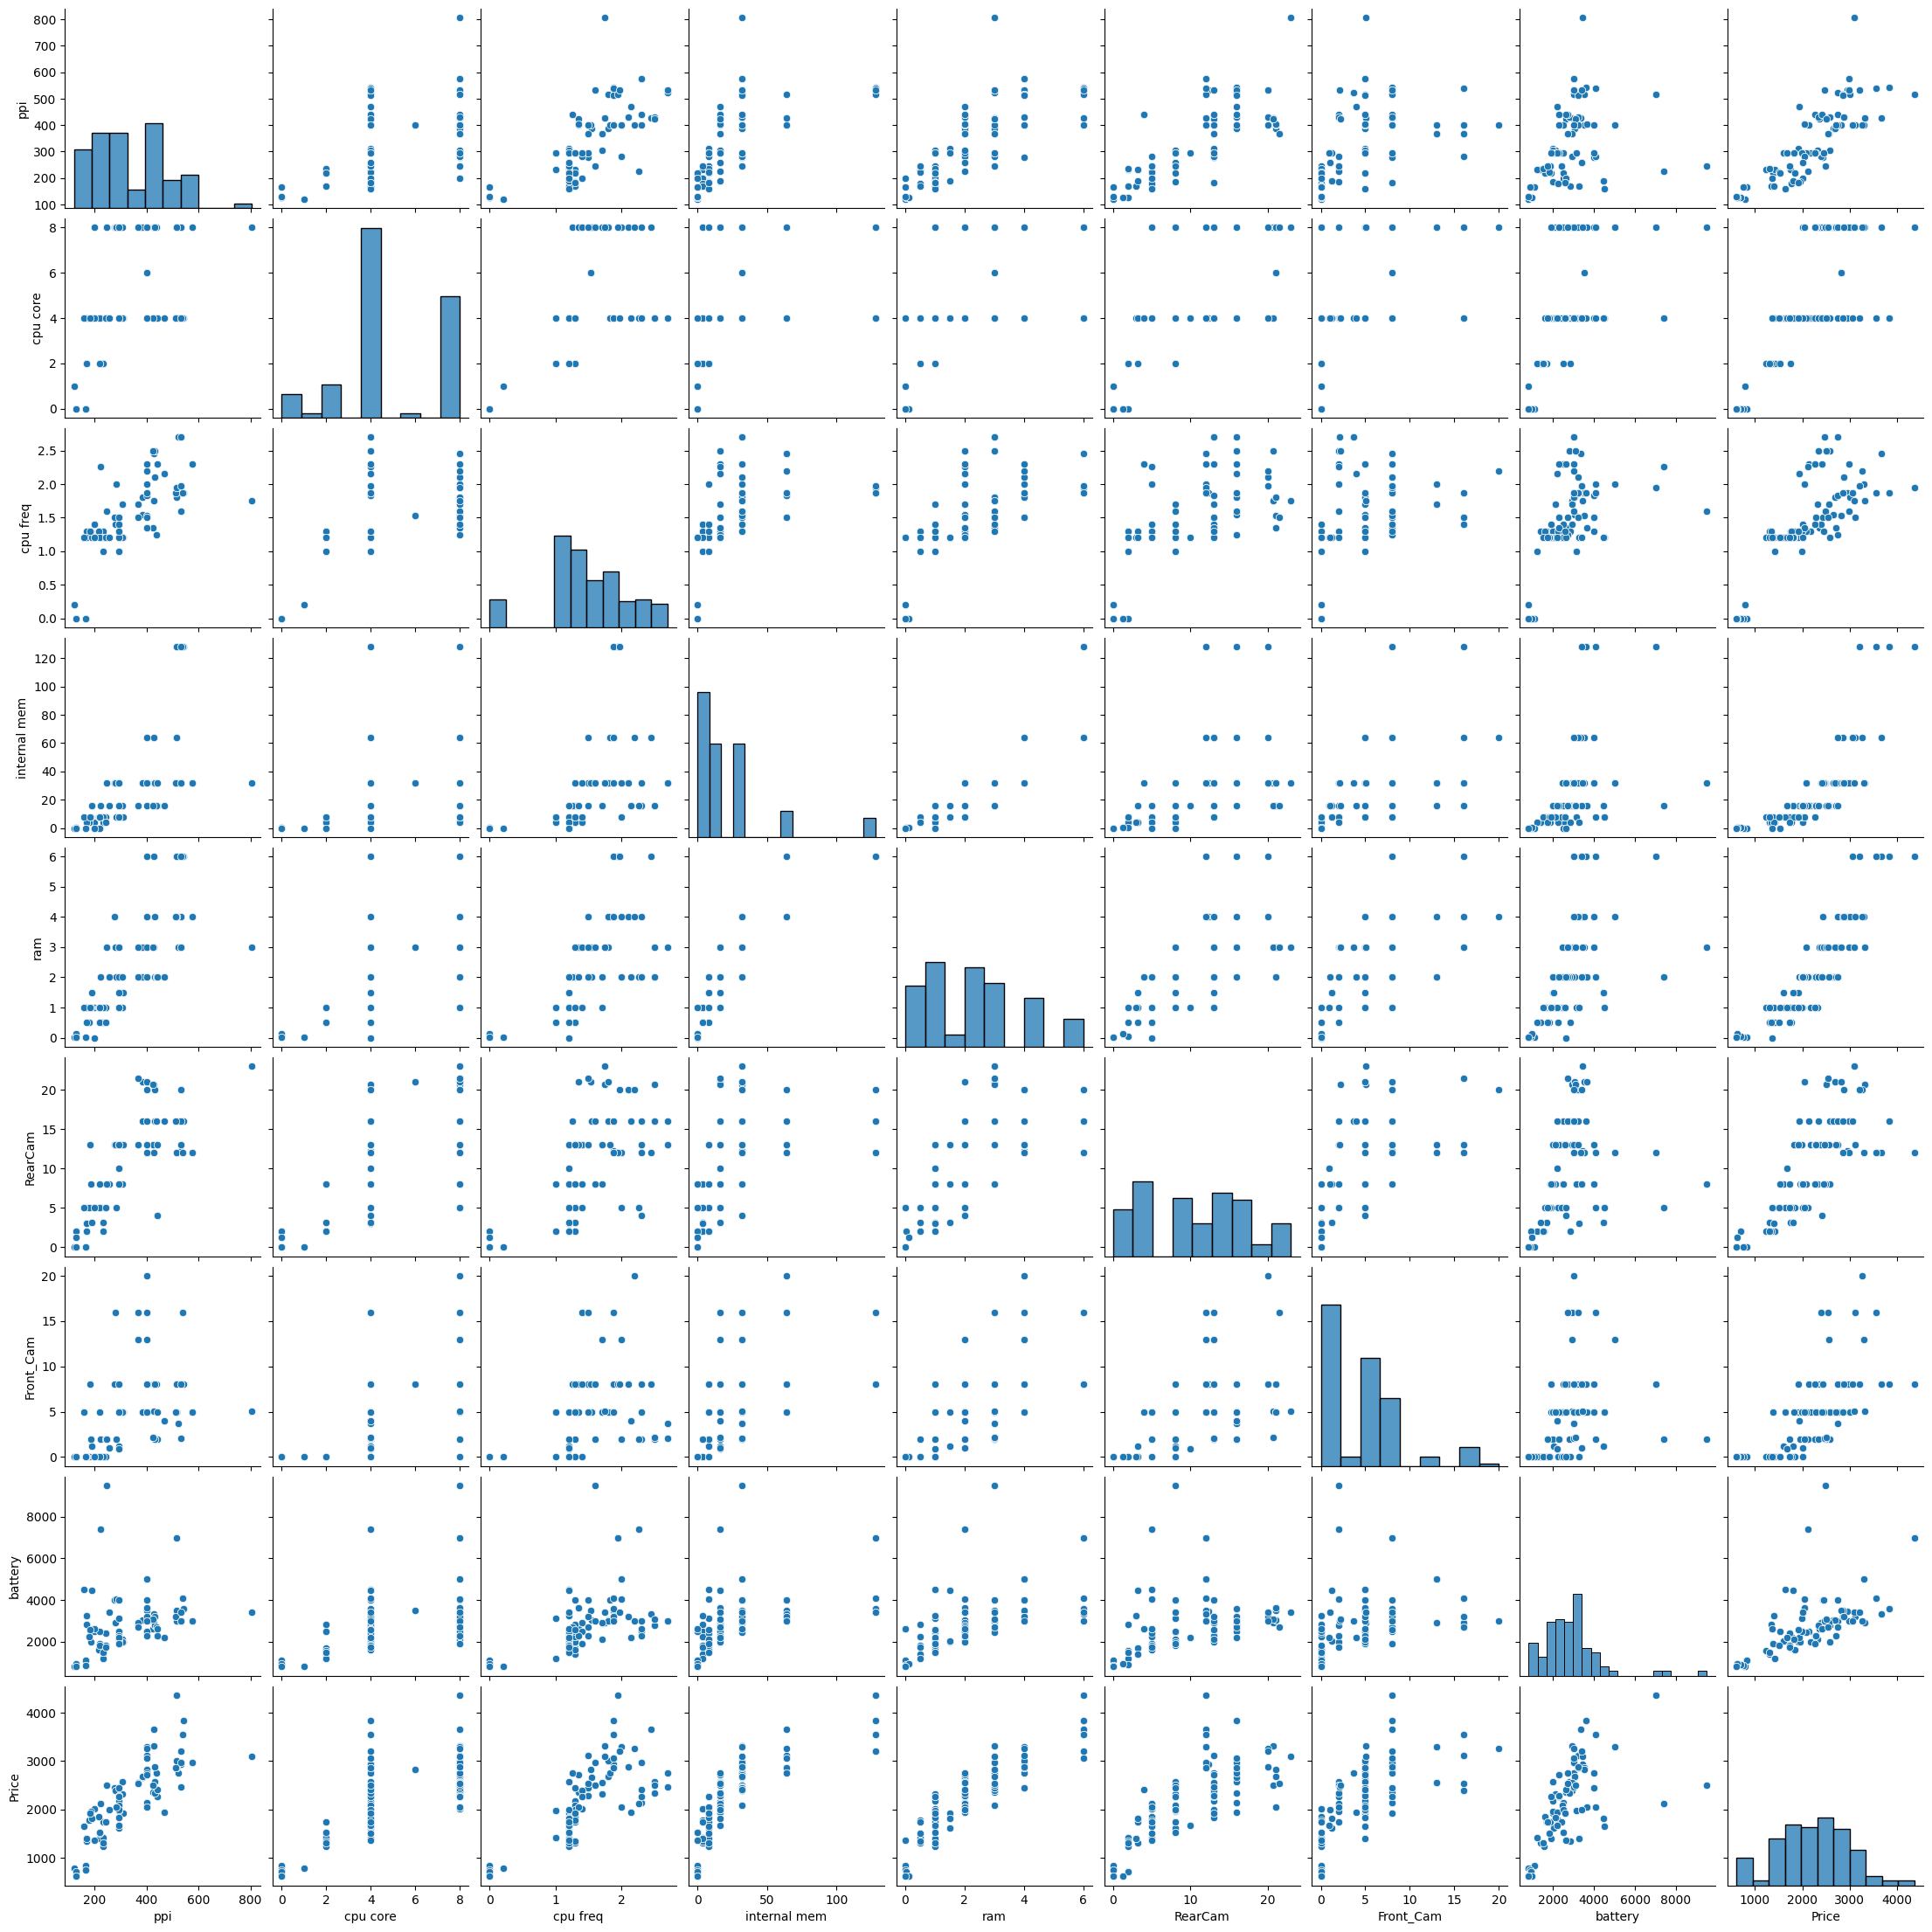

In [79]:
# Combine features and target into a single DataFrame
data_combined = pd.concat([features, target], axis=1)

# Pairplot
sns.pairplot(data_combined)
plt.show()

# Training Model

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=65)

In [88]:
from sklearn.preprocessing import StandardScaler

# Normalizing features to improve performance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [89]:
y_predict = model.predict(X_test)

In [90]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_predict})
print(df)


     Actual    Predicted
141     628   462.882095
67     2044  2445.005544
52     2859  2949.002995
22     2977  3181.334281
93     1810  1791.826985
96     2562  2519.399940
31     2977  3181.334281
70     1734  1735.024714
109    2858  2760.105179
9      2580  2335.865788
89     1302  1483.993325
155    3551  3634.504979
20     2438  2760.469278
28     1390  1738.428555
59     1741  1563.124182
65     2824  2521.845460
72     2044  2445.005544
154    2536  2602.287366
145    1921  1755.151145
116    3287  2989.961021
121    2054  2337.507508
69     2323  2455.897918
39     2392  2642.020067
91     1831  1837.440553
24     1942  2218.168283
150     614   691.661410
114    2880  3028.454192
3      1315  1380.782268
135    2445  2280.548867
74     2571  2218.841780
103    2343  2291.426967
108    1676  1871.387405
87     3837  3634.851826


In [91]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 46132.71512748664
R-squared: 0.9138893748342756


In [92]:
# percentage accuracy
accuracy = model.score(X_test, Y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 91.39%


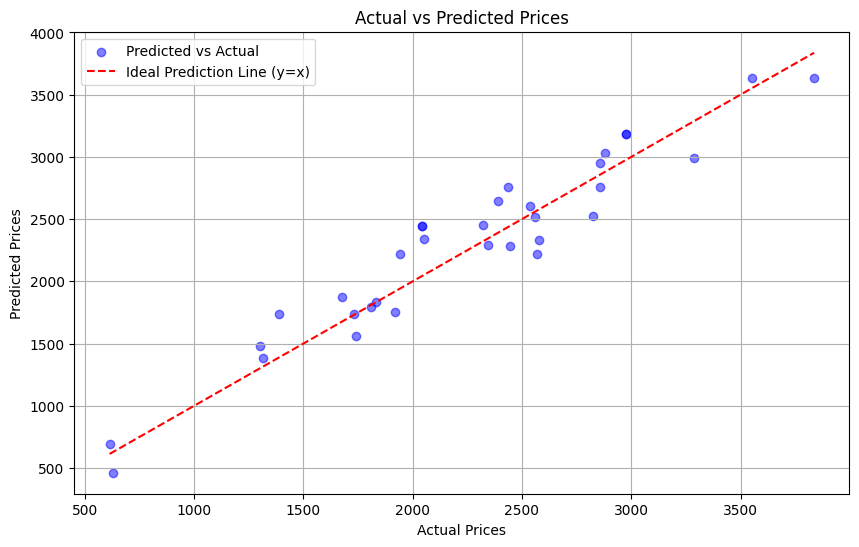

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_predict, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Prediction Line (y=x)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# Saving Model

In [94]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']